In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
TS_DATASET_FOLDER = os.path.join('..', 'dataset')
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, 'preprocessed_traces')
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, 'preproc_ts.df')

TARGET = 'statement'
TRACES = 'syllables_02_STFT'

In [3]:
df = pd.read_csv(DF_PREPROC_FILE).drop(columns=['Unnamed: 0'])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,path,sex,begin_s,end_s,fourier_coeffs,filtered_fourier_coeffs,syll_0_start_index,syll_1_start_index,syll_2_start_index,syll_3_start_index,syll_4_start_index,syll_5_start_index,syll_6_start_index,syll_7_start_index
0,speech,surprised,strong,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.007500,2.498167,[1.0788441e-05 3.7551079e-02 3.6168553e-02 ......,[1.0788441e-05 3.7551045e-02 3.6168423e-02 ......,0,2872,3920,4536,5536,6480,7136,8936
1,speech,surprised,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.024167,2.357167,[8.6426735e-06 1.0938305e-02 7.4250461e-03 ......,[8.6426735e-06 1.0938293e-02 7.4250125e-03 ......,0,1544,2528,4032,5224,5984,6712,7992
2,speech,angry,normal,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.029333,2.467500,[1.1563301e-05 4.1558143e-02 2.8845785e-02 ......,[1.15633011e-05 4.15581055e-02 2.88456734e-02 ...,0,2992,4368,4912,5896,6768,7400,8624
3,speech,fearful,normal,dogs,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.030500,2.710000,[2.0563602e-06 1.1770763e-02 5.6602592e-03 ......,[2.0563602e-06 1.1770754e-02 5.6602429e-03 ......,0,4576,5064,6240,7544,8248,8784,10072
4,speech,fearful,strong,kids,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.047667,3.127167,[6.9618225e-05 1.3387279e-02 8.0524459e-02 ......,[6.9618225e-05 1.3387272e-02 8.0524310e-02 ......,0,1984,2504,3648,5176,8320,10256,12472


In [4]:
traces_dict = {}
files = os.listdir(TS_PREPROC_FOLDER)

for file in files:

    if file.endswith('.npy'):
        file_path = os.path.join(TS_PREPROC_FOLDER, file)
        # dictionary keys are the file names
        key = os.path.splitext(file)[0]
        # load array
        traces_dict[key] = np.load(file_path, allow_pickle=True)

traces_dict.keys()

dict_keys(['clean_trace', 'syllables_1_ts', 'std_phon_trace', 'syllables_02_sc', 'spectral_mode', 'syllables_3_ts', 'syllables_5_ts', 'syllables_0_ts', 'syllables_2_ts', 'spectral_centroid', 'syllables_fourier', 'traces_fourier', 'syllables_02_STFT', 'syllables_6_ts', 'full_stft', 'syllables_4_ts'])

In [5]:
traces = traces_dict[TRACES]
traces

array([[[  1.26500731,   5.68993118,   5.9124244 , ...,  -3.7766364 ,
          -2.66279062,  -2.37882361],
        [ -2.47914302,   6.42696554,   5.06785043, ...,  -0.38271389,
           0.37649934,   1.47306728],
        [ -2.09884361,   5.74763755,   5.15509606, ...,  -1.28364717,
          -2.20552429,  -0.63863625],
        ...,
        [ -2.63185789,   6.92692148,   7.30862121, ...,  -0.76279143,
           0.98489513,   0.2818924 ],
        [ -3.87456592,   5.87727676,   5.40423409, ...,  -2.25553932,
          -1.49395756,  -1.36999463],
        [ -3.68517477,   5.98647473,   5.06738693, ...,  -2.42848249,
          -1.74837971,  -1.36252302]],

       [[  0.27999848,   0.52466408,   0.83632144, ...,  -3.08250805,
          -4.69786067,  -6.64707314],
        [ -1.29489642,   1.32124651,   0.31290242, ...,  -1.72027536,
          -4.85847482,  -9.19656651],
        [  0.94094217,   4.62093735,   2.41951508, ...,  -4.50294911,
          -4.17199722,  -4.35572206],
        ...,


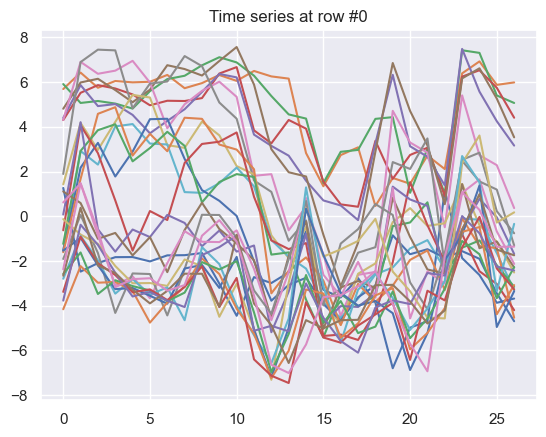

In [6]:
index = 0
plt.plot(traces[index])
plt.title(f'Time series at row #{index}')
plt.show()

In [7]:
# sort by actors
sorted_indices = df['actor'].argsort()
df = df.iloc[sorted_indices].reset_index(drop=True)

traces = traces[sorted_indices]

traces

array([[[ 1.26500731,  5.68993118,  5.9124244 , ..., -3.7766364 ,
         -2.66279062, -2.37882361],
        [-2.47914302,  6.42696554,  5.06785043, ..., -0.38271389,
          0.37649934,  1.47306728],
        [-2.09884361,  5.74763755,  5.15509606, ..., -1.28364717,
         -2.20552429, -0.63863625],
        ...,
        [-2.63185789,  6.92692148,  7.30862121, ..., -0.76279143,
          0.98489513,  0.2818924 ],
        [-3.87456592,  5.87727676,  5.40423409, ..., -2.25553932,
         -1.49395756, -1.36999463],
        [-3.68517477,  5.98647473,  5.06738693, ..., -2.42848249,
         -1.74837971, -1.36252302]],

       [[-5.46933686, -2.29755139, -2.11689303, ..., -3.35699502,
         -2.49948089, -3.45376561],
        [-1.61183403, -4.28697198,  1.98656277, ..., -3.24523313,
         -3.97482995, -2.27460827],
        [-4.1269466 ,  0.62125114,  4.02175777, ..., -3.54327857,
         -2.58818872, -2.1367156 ],
        ...,
        [-3.92221362, -3.18245343,  4.29898858, ..., -

In [8]:
from sklearn.model_selection import train_test_split

split_index = df[df['actor'] == 'actor_19'].index[0]

X_train = traces[:split_index]
X_test = traces[split_index:]

y_train = df[TARGET][:split_index].to_numpy()
y_test = df[TARGET][split_index:].to_numpy()

X_train_v, X_valid, y_train_v, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

X_train_v.shape, X_valid.shape, X_test.shape, y_train_v.shape, y_valid.shape, y_test.shape

((1462, 27, 27), (366, 27, 27), (624, 27, 27), (1462,), (366,), (624,))

# KNN using euclidean distance

In [9]:
from sklearn.metrics import accuracy_score
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
import optuna

# objective function to be minimized
"""
def objective_fun(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    distance = trial.suggest_categorical('distance', ['euclidean'])
    n_jobs = trial.suggest_int('n_jobs', -1, -1)

    knn = KNeighborsTimeSeriesClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        distance=distance,
        n_jobs=n_jobs
    )

    knn.fit(X_train_v, y_train_v)
    y_pred = knn.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective_fun, n_trials=100, n_jobs=-1)
"""

"\ndef objective_fun(trial):\n\n    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)\n    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])\n    distance = trial.suggest_categorical('distance', ['euclidean'])\n    n_jobs = trial.suggest_int('n_jobs', -1, -1)\n\n    knn = KNeighborsTimeSeriesClassifier(\n        n_neighbors=n_neighbors,\n        weights=weights,\n        distance=distance,\n        n_jobs=n_jobs\n    )\n\n    knn.fit(X_train_v, y_train_v)\n    y_pred = knn.predict(X_valid)\n\n    accuracy = accuracy_score(y_valid, y_pred)\n\n    return accuracy\n\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective_fun, n_trials=100, n_jobs=-1)\n"

In [10]:
#best_params = study.best_params
best_params = {'n_neighbors': 4, 'weights': 'distance', 'distance': 'euclidean', 'n_jobs': -1}

In [11]:
knn = KNeighborsTimeSeriesClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance='euclidean', n_jobs=-1, n_neighbors=4,
                               weights='distance')

In [12]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        dogs       0.97      0.96      0.96       312
        kids       0.96      0.97      0.96       312

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



# KNN using DTW

In [13]:
# objective function to be minimized
"""
def objective_fun(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    distance = trial.suggest_categorical('distance', ['dtw'])
    n_jobs = trial.suggest_int('n_jobs', -1, -1)

    knn = KNeighborsTimeSeriesClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        distance=distance,
        n_jobs=n_jobs
    )

    knn.fit(X_train_v, y_train_v)
    y_pred = knn.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective_fun, n_trials=100, n_jobs=-1)
"""

"\ndef objective_fun(trial):\n\n    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)\n    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])\n    distance = trial.suggest_categorical('distance', ['dtw'])\n    n_jobs = trial.suggest_int('n_jobs', -1, -1)\n\n    knn = KNeighborsTimeSeriesClassifier(\n        n_neighbors=n_neighbors,\n        weights=weights,\n        distance=distance,\n        n_jobs=n_jobs\n    )\n\n    knn.fit(X_train_v, y_train_v)\n    y_pred = knn.predict(X_valid)\n\n    accuracy = accuracy_score(y_valid, y_pred)\n\n    return accuracy\n\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective_fun, n_trials=100, n_jobs=-1)\n"

In [14]:
#best_params = study.best_params
best_params = {'n_neighbors': 4, 'weights': 'distance', 'distance': 'dtw', 'n_jobs': -1}

In [15]:
knn = KNeighborsTimeSeriesClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [16]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        dogs       0.97      0.96      0.96       312
        kids       0.96      0.97      0.97       312

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

